In [2]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")   #Ignore warnings


In [3]:
# Read files
fuel_df = pd.read_csv("Resources/Fuel_Consumption_2000-2022.csv")
fuel_df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [4]:
# Get information of dataframe
fuel_df.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [5]:
fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


There are no null values in the dataframe


In [6]:
# drop duplicates
fuel_df.duplicated(keep="first")

0        False
1        False
2        False
3        False
4        False
         ...  
22551    False
22552    False
22553    False
22554    False
22555    False
Length: 22556, dtype: bool

In [7]:
fuel_df["MAKE"].value_counts()


CHEVROLET        1725
BMW              1490
GMC              1357
FORD             1276
MERCEDES-BENZ     935
                 ... 
ALFA ROMEO          8
SRT                 4
GENESIS             4
BUGATTI             3
PLYMOUTH            2
Name: MAKE, Length: 87, dtype: int64

In [8]:
fuel_df["ENGINE SIZE"].value_counts()

2.0    3020
3.0    2070
2.5    1506
3.5    1467
5.3    1230
       ... 
2.1       5
0.9       3
6.3       3
0.8       3
4.1       1
Name: ENGINE SIZE, Length: 63, dtype: int64

In [9]:
fuel_df["VEHICLE CLASS"].unique()

array(['COMPACT', 'MID-SIZE', 'SUBCOMPACT', 'STATION WAGON - MID-SIZE',
       'MINICOMPACT', 'TWO-SEATER', 'STATION WAGON - SMALL', 'FULL-SIZE',
       'SUV', 'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD',
       'PICKUP TRUCK - SMALL', 'MINIVAN', 'SUV - STANDARD',
       'SPECIAL PURPOSE VEHICLE', 'SUV - SMALL', 'Compact', 'SUV: Small',
       'Two-seater', 'Mid-size', 'Minicompact', 'Subcompact',
       'Station wagon: Small', 'Full-size', 'SUV: Standard',
       'Special purpose vehicle', 'Pickup truck: Small',
       'Pickup truck: Standard', 'Minivan', 'Van: Passenger',
       'Station wagon: Mid-size'], dtype=object)

In [10]:
#It has been identified the vehicle class has some type connect with "-" and some connected with ":", replace one of them
fuel_df["VEHICLE CLASS"] = fuel_df["VEHICLE CLASS"].apply(str.upper)



# "SUV - Small" is a new type of vehicle appears after 2017, add "standard" after SUV
fuel_df = fuel_df.replace({"VEHICLE CLASS": {":": "-", "SUV":"SUV-STANDARD"}})
fuel_df["VEHICLE CLASS"] = fuel_df["VEHICLE CLASS"].str.replace(" ", "")

In [11]:
year_df = fuel_df[fuel_df["YEAR"]>2017]
year_df.head(15)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
17553,2018,Acura,ILX,COMPACT,2.4,4,AM8,Z,9.4,6.8,8.2,34,192
17554,2018,Acura,MDX SH-AWD,SUV:SMALL,3.5,6,AS9,Z,12.6,9.0,11.0,26,259
17555,2018,Acura,MDX SH-AWD Elite,SUV:SMALL,3.5,6,AS9,Z,12.2,9.0,10.7,26,251
17556,2018,Acura,MDX Hybrid AWD,SUV:SMALL,3.0,6,AM7,Z,9.1,9.0,9.0,31,210
17557,2018,Acura,NSX,TWO-SEATER,3.5,6,AM9,Z,11.1,10.8,11.0,26,261
17558,2018,Acura,RDX AWD,SUV:SMALL,3.5,6,AS6,Z,12.4,8.7,10.7,26,250
17559,2018,Acura,RLX Hybrid,MID-SIZE,3.5,6,AM7,Z,8.4,8.2,8.4,34,196
17560,2018,Acura,TLX,COMPACT,2.4,4,AM8,Z,10.0,7.1,8.7,32,205
17561,2018,Acura,TLX A-SPEC,COMPACT,2.4,4,AM8,Z,10.2,7.4,8.9,32,209
17562,2018,Acura,TLX SH-AWD,COMPACT,3.5,6,AS9,Z,11.4,7.7,9.8,29,228


In [12]:
# Pick the most popular 5 vehcle tyes
vehiclecl_df = fuel_df["VEHICLE CLASS"].value_counts().to_frame()
top_cl = list(vehiclecl_df[0:5].index)
top_cl

['SUV-STANDARD', 'COMPACT', 'MID-SIZE', 'SUBCOMPACT', 'PICKUPTRUCK-STANDARD']

In [13]:
vehiclecl_df.head(10)

,VEHICLE CLASS
SUV-STANDARD,3154
COMPACT,3127
MID-SIZE,2960
SUBCOMPACT,2010
PICKUPTRUCK-STANDARD,1689
FULL-SIZE,1503
TWO-SEATER,1312
MINICOMPACT,994
SUV:SMALL,929
SUV-SMALL,827


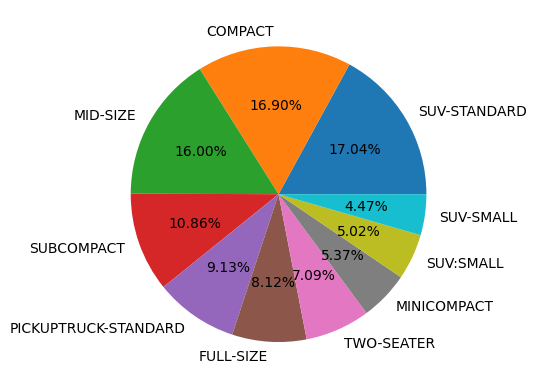

In [14]:
# Show the composition of vehicle classes
plt.pie(vehiclecl_df[:10]["VEHICLE CLASS"], labels=vehiclecl_df[0:10].index, autopct="%1.2f%%")
plt.show()

In [15]:
# Has the emissions being reduced over the years with technology advancement?
fuel_reset = fuel_df.set_index("VEHICLE CLASS")
vehity_df = fuel_reset.loc[top_cl].reset_index()
emsconspt_year = vehity_df.groupby(by=["VEHICLE CLASS", "YEAR"], as_index=False).agg({"EMISSIONS": "mean", "FUEL CONSUMPTION": "mean"})
emsconspt_year

,VEHICLE CLASS,YEAR,EMISSIONS,FUEL CONSUMPTION
0,COMPACT,2000,213.371429,10.804762
1,COMPACT,2001,210.551724,10.671034
2,COMPACT,2002,211.082707,10.672180
3,COMPACT,2003,208.965035,10.530769
4,COMPACT,2004,212.025974,10.724675
...,...,...,...,...
100,SUV-STANDARD,2013,279.663366,15.358416
101,SUV-STANDARD,2014,271.558824,15.131373
102,SUV-STANDARD,2015,302.606061,15.853535
103,SUV-STANDARD,2016,305.308411,15.328972


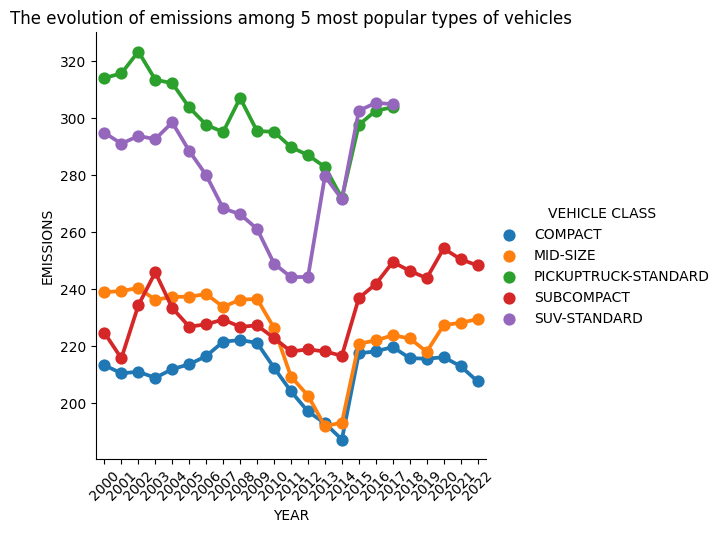

In [16]:
# Plot the relationship between emission and year for top 5 vehicle class
sns.catplot(emsconspt_year, x="YEAR", y="EMISSIONS", hue="VEHICLE CLASS", kind="point")
plt.title("The evolution of emissions among 5 most popular types of vehicles")
plt.xticks (rotation=45)
plt.show()

Text(0.5, 1.0, 'How the fuel consumption changed during 2000-2022 in 5 most popular vehicle types')

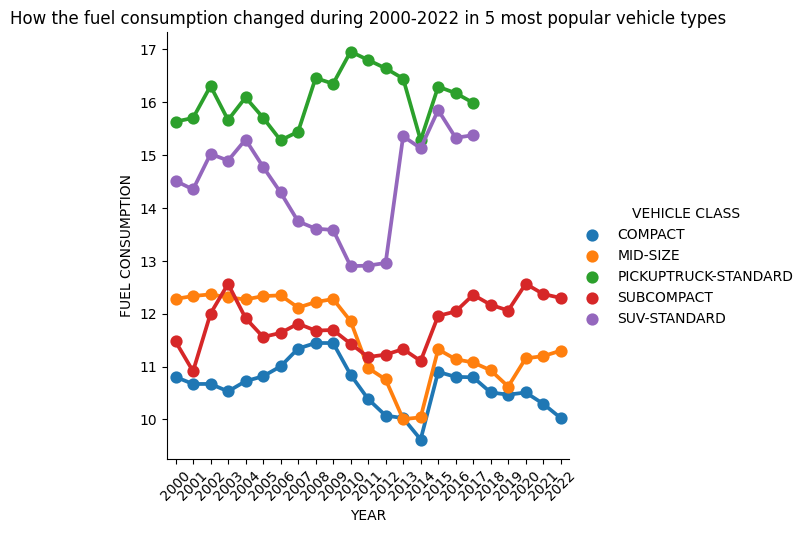

In [17]:
# Plot how the fuel consumption changed over the years among 5 most popular vehicle types
sns.catplot(data=emsconspt_year, x="YEAR", y="FUEL CONSUMPTION", hue="VEHICLE CLASS", kind="point")
plt.xticks(rotation=45)
plt.title("How the fuel consumption changed during 2000-2022 in 5 most popular vehicle types")

Overall, between 2003 to 2014, the emissions declined, and reached the lowest in 2014, then it climbed again. The fuel consumption reached their lowest in 2014 for most of the cars, but SUV hit it low during 2010-2012 for 3 years in a row.

In [18]:
# How about the engine size and cylinder changes over the years? Could these 2 be the contributing factors to the climbing emissions?

tech_df = vehity_df.groupby(["YEAR", "VEHICLE CLASS"], as_index=False).agg({"CYLINDERS": "mean", "ENGINE SIZE": "mean"})
tech_df.head()

,YEAR,VEHICLE CLASS,CYLINDERS,ENGINE SIZE
0,2000,COMPACT,4.904762,2.348571
1,2000,MID-SIZE,5.844156,3.029870
2,2000,PICKUPTRUCK-STANDARD,6.608696,4.208696
3,2000,SUBCOMPACT,5.365385,2.810577
4,2000,SUV-STANDARD,6.041237,3.624742


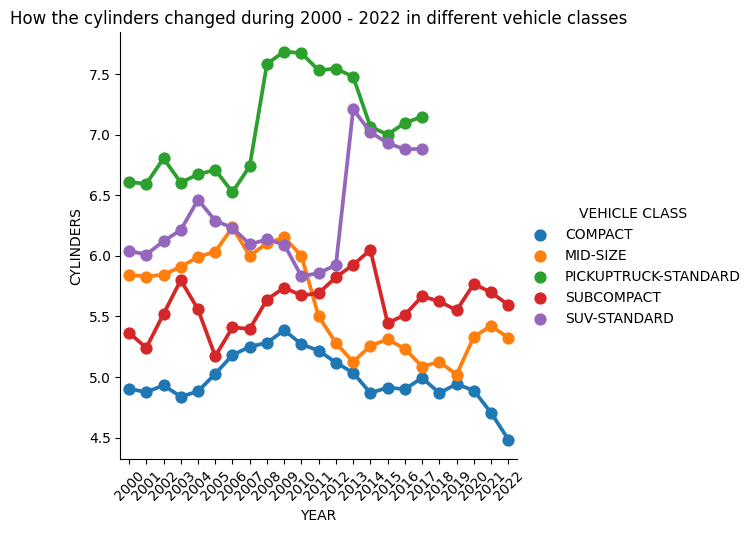

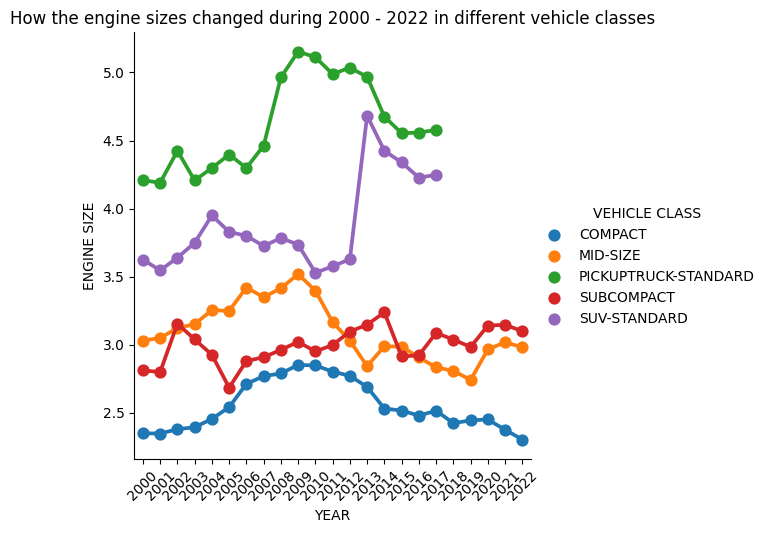

In [19]:
# Plot the changes of cylinders and engine sizes over the years among different vehicle classes

sns.catplot(data=tech_df, x="YEAR", y="CYLINDERS", hue="VEHICLE CLASS", kind="point")
plt.title("How the cylinders changed during 2000 - 2022 in different vehicle classes")
plt.xticks(rotation=45)
sns.catplot(data=tech_df, x="YEAR", y="ENGINE SIZE", hue="VEHICLE CLASS", kind="point")
plt.title("How the engine sizes changed during 2000 - 2022 in different vehicle classes")
plt.xticks(rotation=45)
plt.show()


In [20]:
# Do people prefer cars with the lowest fuel consumption?

# 10 cars with the lowest fuel consumption
fuel_low = fuel_df.nsmallest(10, "FUEL CONSUMPTION")
fuel_low

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
12084,2012,TOYOTA,PRIUS c,COMPACT,1.5,4,AV,X,3.5,4.0,3.7,76,85
13143,2013,TOYOTA,PRIUS c,COMPACT,1.5,4,AV,X,3.5,4.0,3.7,76,85
14184,2014,TOYOTA,PRIUS c,COMPACT,1.5,4,AV,X,3.6,4.0,3.8,74,87
9912,2010,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,X,3.7,4.0,3.8,74,87
11009,2011,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,X,3.7,4.0,3.8,74,87
12083,2012,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,X,3.7,4.0,3.8,74,87
13142,2013,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,X,3.7,4.0,3.8,74,87
13684,2014,HONDA,ACCORD HYBRID,MID-SIZE,2.0,4,AV,X,3.7,4.0,3.8,74,87
14183,2014,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,X,3.7,4.0,3.8,74,87
328,2000,HONDA,INSIGHT,SUBCOMPACT,1.0,3,M5,X,3.9,3.2,3.6,78,83


In [21]:
# 10 most popular cars
popular_cars = fuel_df.groupby(["MAKE","MODEL", "YEAR"], as_index=False)["FUEL"].count().sort_values(by="FUEL", ascending=False)
popular_cars[:10]

,MAKE,MODEL,YEAR,FUEL
4099,DODGE,RAM 1500,2001,9
4659,FORD,F150 FFV,2013,8
4660,FORD,F150 FFV,2014,8
2818,CHEVROLET,HHR PANEL FFV,2009,8
2817,CHEVROLET,HHR PANEL,2011,8
4667,FORD,F150 FFV 4X4,2014,8
4666,FORD,F150 FFV 4X4,2013,8
2813,CHEVROLET,HHR FFV,2009,8
2812,CHEVROLET,HHR,2011,8
4665,FORD,F150 FFV 4X4,2012,8


From the above 2 dataframes we can deduce that the most popular cars are not the cars with lowest fuel consumption.

<Axes: xlabel='FUEL CONSUMPTION', ylabel='EMISSIONS'>

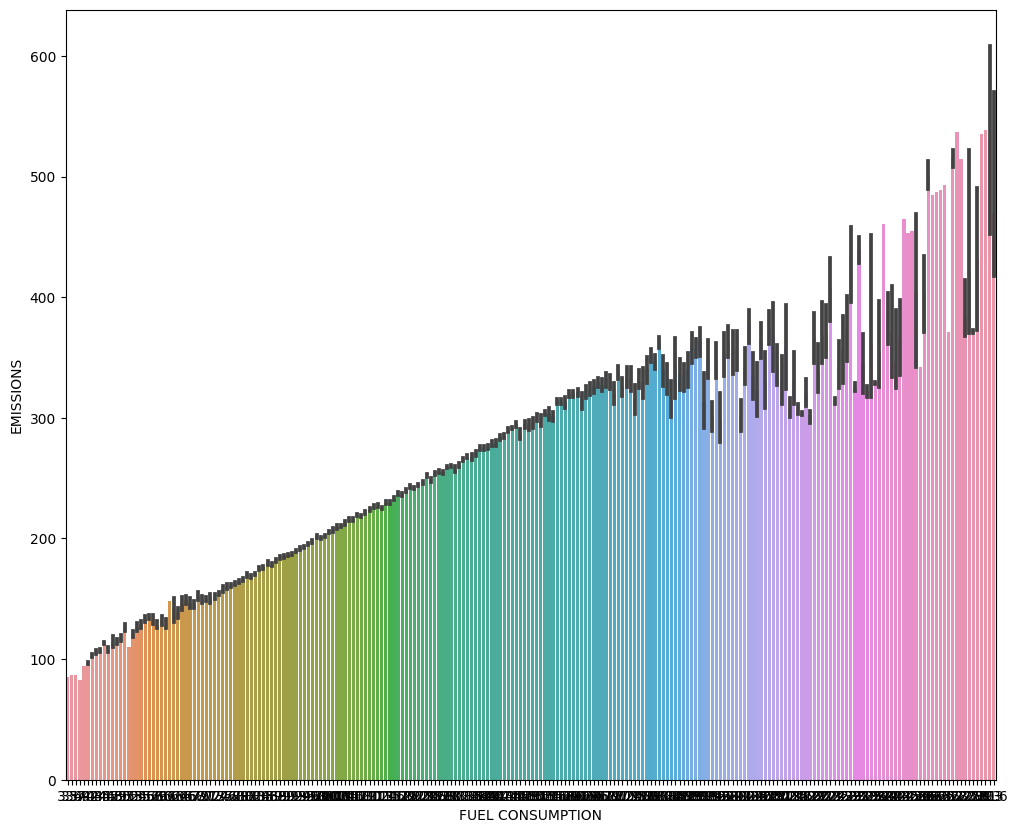

In [22]:
# Does emission and fuel consumption have any relationships? Plot a barplot to explore
fig = plt.figure(figsize=(12,10))
sns.barplot(data=fuel_df.sort_values(by="FUEL CONSUMPTION"), x="FUEL CONSUMPTION", y="EMISSIONS")

The fuel consumption seemed to be positively related to emissions, but not anymore when reaching a point.

<Axes: >

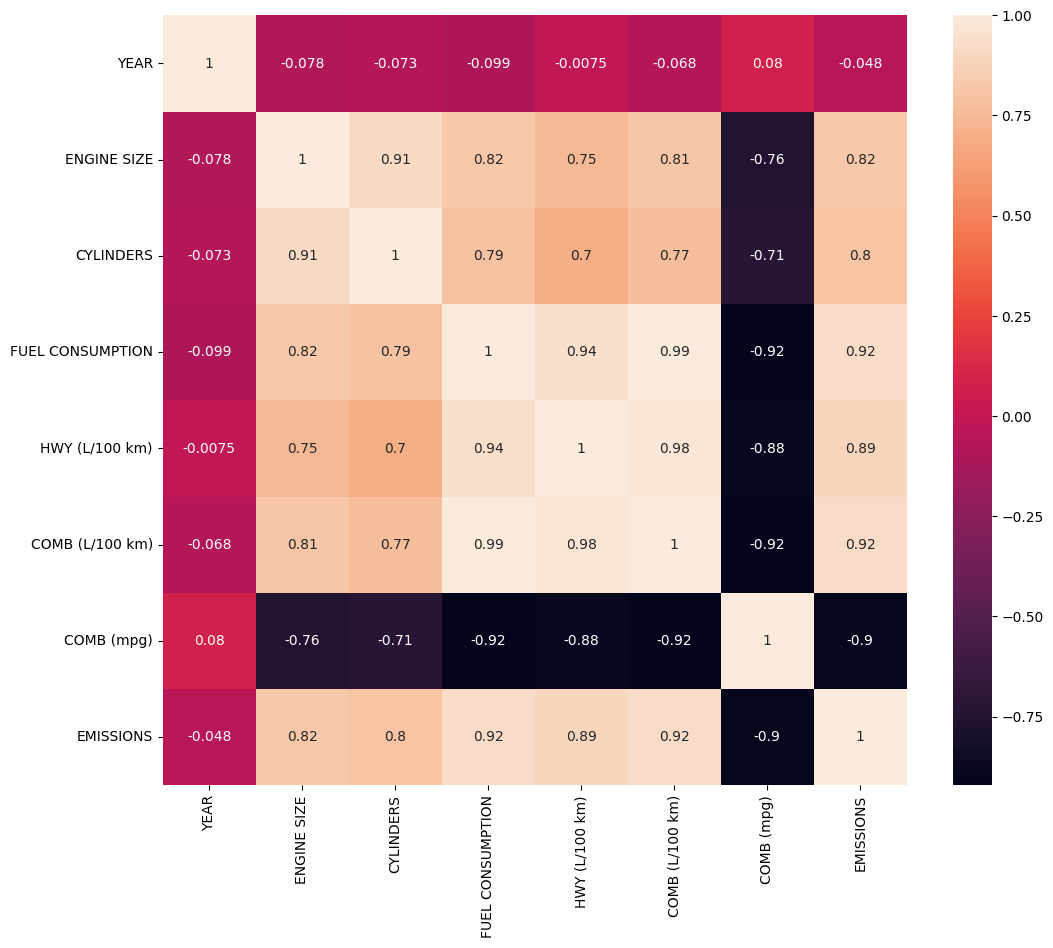

In [23]:
# plot heatmap for the correlations among the different metrics
fig = plt.figure(figsize=(12,10))
sns.heatmap(fuel_df.corr(), annot=True)

# Machine learning by using XGBoost

In [24]:
# import dependencies
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Define X and y
X = fuel_df.drop(["FUEL CONSUMPTION"], axis=1)
y = fuel_df["FUEL CONSUMPTION"]

In [26]:
# Separate numeric and catagorical X then scale and one hot encoder
x_no = X.select_dtypes(include="number")
x_cata = X.select_dtypes(exclude="number")

# Scale numeric data
scaler = StandardScaler()
x_no_scaled = pd.DataFrame(data=scaler.fit_transform(x_no), columns=x_no.columns)
y_scaled = scaler.fit_transform(y.values.reshape(-1,1))


# Transform catagorical x
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
x_cata_encoder = pd.DataFrame(data=encoder.fit_transform(x_cata), columns=encoder.get_feature_names_out())
# combine numberic and catagoric x
X = pd.concat([x_no_scaled, x_cata_encoder], axis=1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, random_state=37)


In [27]:
# Use XGBRegressor for ML
XGBR = xgb.XGBRegressor()
XGBR.fit(X_train, y_train)
print(XGBR.score(X_train, y_train))
print(XGBR.score(X_test, y_test))

0.9995136901376611
0.9993223393296959


In [28]:
predictions = XGBR.predict(X_test)
score = mean_absolute_error(predictions, y_test)
print(score)

0.01938461308214253


Predict emissions

In [29]:
# Define new features and target for ML
X1 = fuel_df.drop(["EMISSIONS"], axis=1)
y1 = fuel_df["EMISSIONS"]

x1_no = X1.select_dtypes(include="number")
x1_cata = X1.select_dtypes(exclude="number")

In [33]:
# scale the numerical features and apply onehotencoder to catagorical data
x1_no_scaled = pd.DataFrame(data=scaler.fit_transform(x1_no), columns=x1_no.columns)
y1_scaled = scaler.fit_transform(y1.values.reshape(-1,1))

x1_cata_encoder = pd.DataFrame(data=encoder.fit_transform(x1_cata), columns=encoder.get_feature_names_out())

X1 = pd.concat([x1_no_scaled, x1_cata_encoder], axis=1)

In [37]:
# Divide data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1_scaled, random_state=42)
# ML
XGBR.fit(X1_train, y1_train)
pred_2 = XGBR.predict(X1_test)
score = mean_absolute_error (pred_2, y1_test)
print(score)

0.010280087584411016


In [38]:
print(XGBR.score(X1_test, y1_test))
print(XGBR.score(X1_train, y1_train))

0.9996159989810611
0.9997917924146065
